In [1]:
import torch
from utils import DataLoader, evaluate_model
from models import BiLSTMModel
from matplotlib import pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
dl = DataLoader(
    benchmark="benchmark_2",
    split=None,
    embedding="bert_sequential", 
    max_len=16,
    include_axes=True,
    shuffle_axes=False,  
    normalization="zscore"
)

INFO:utils.dataloader:Initializing DataLoader...
INFO:utils.dataloader:Using device: cuda
INFO:utils.dataloader:Loading dataset for benchmark benchmark_2 with split None
INFO:utils.dataloader:No split specified; loading all splits (train, validation, test).
INFO:utils.dataloader:Dataset loaded successfully.
INFO:utils.dataloader:Initializing embedding for method bert_sequential...
INFO:utils.dataloader:Initialized BERT model and tokenizer.
INFO:utils.dataloader:Embedding resources initialized.


In [4]:
data = dl.preprocess()
X_train, y_train = data["train"]
X_valid, y_valid = data["validation"]
X_test, y_test = data["test"]

INFO:utils.dataloader:Starting preprocessing of dataset(s)...
INFO:utils.dataloader:Processing split: train with 365 samples...
INFO:utils.dataloader:Processing a single dataset split...
INFO:utils.dataloader:Combined sequential feature vector shape: torch.Size([365, 144, 768])
INFO:utils.dataloader:Extracting and normalizing target values...
INFO:utils.dataloader:Normalizing target values...
INFO:utils.dataloader:Z-score parameters: mean=[4.64040685e+01 9.55949315e+00 1.10821918e-02], std=[13.53428538  2.54048638  1.18524837]
INFO:utils.dataloader:Processing split: validation with 104 samples...
INFO:utils.dataloader:Processing a single dataset split...
INFO:utils.dataloader:Combined sequential feature vector shape: torch.Size([104, 144, 768])
INFO:utils.dataloader:Extracting and normalizing target values...
INFO:utils.dataloader:Normalizing target values...
INFO:utils.dataloader:Z-score parameters: mean=[43.97461538  9.55625     0.07490385], std=[12.19832396  2.78474802  1.2170377 ]


In [5]:
save_path = "baseline_weights/benchmark_2/bilstm.pth"
input_dim = 768
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [6]:
grid_params = {
    "hidden_dim": [64, 128, 256],
    "lr": [0.01, 0.001, 0.0001]
}
epochs = 100

INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=128, bidirectional=True
INFO:models.bilstm:BiLSTM Grid search: hidden_dim=64, lr=0.01
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=64, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.2220 for hidden_dim=64, lr=0.01


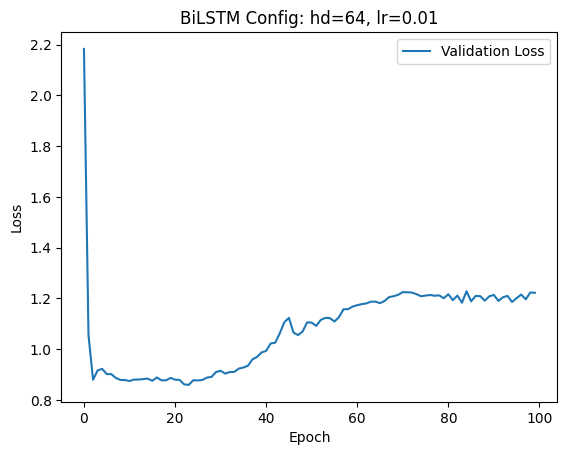

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=64, lr=0.001
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=64, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.1628 for hidden_dim=64, lr=0.001


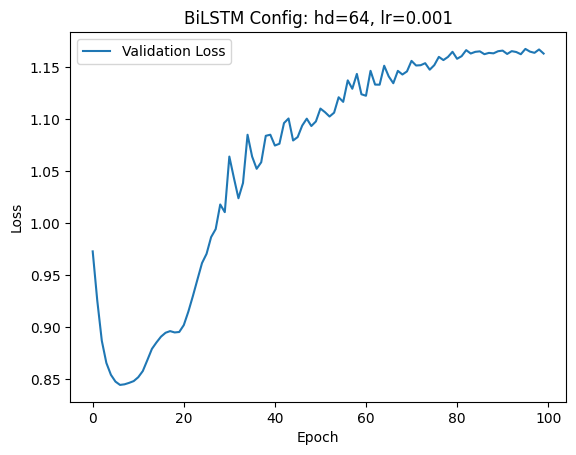

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=64, lr=0.0001
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=64, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 0.9109 for hidden_dim=64, lr=0.0001


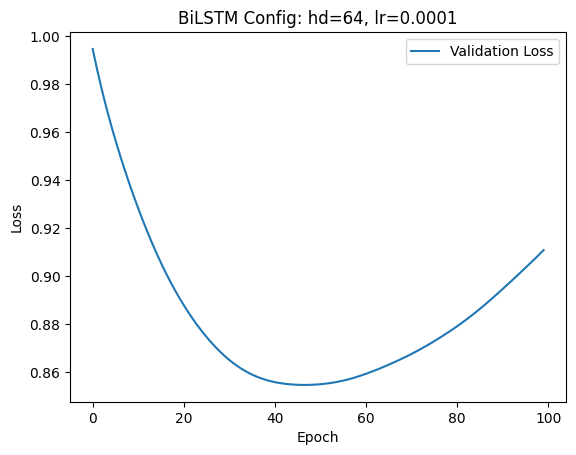

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=128, lr=0.01
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=128, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.2734 for hidden_dim=128, lr=0.01


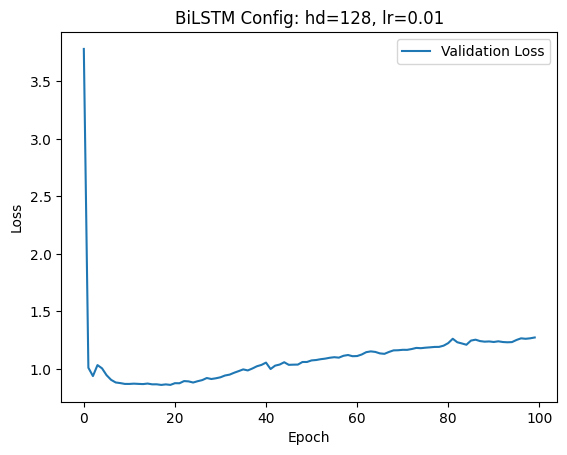

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=128, lr=0.001
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=128, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.2164 for hidden_dim=128, lr=0.001


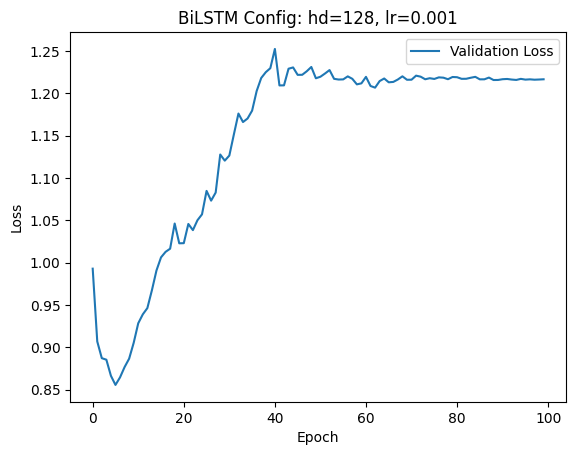

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=128, lr=0.0001
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=128, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.0403 for hidden_dim=128, lr=0.0001


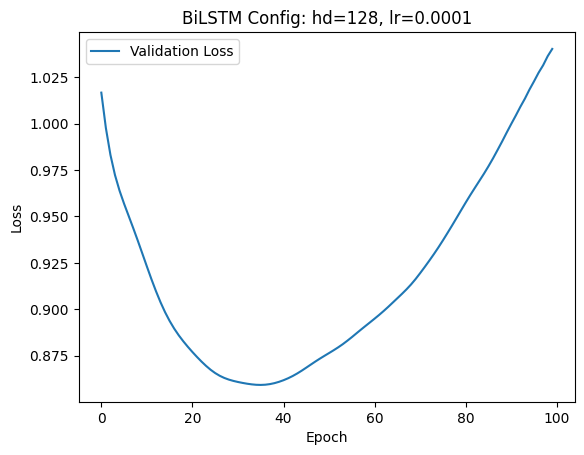

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=256, lr=0.01
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=256, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.1471 for hidden_dim=256, lr=0.01


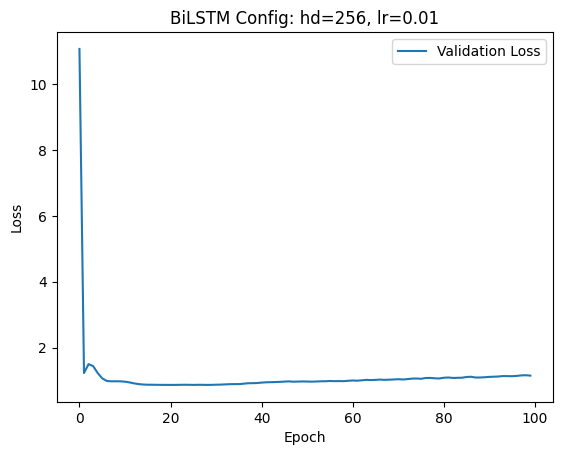

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=256, lr=0.001
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=256, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.0976 for hidden_dim=256, lr=0.001


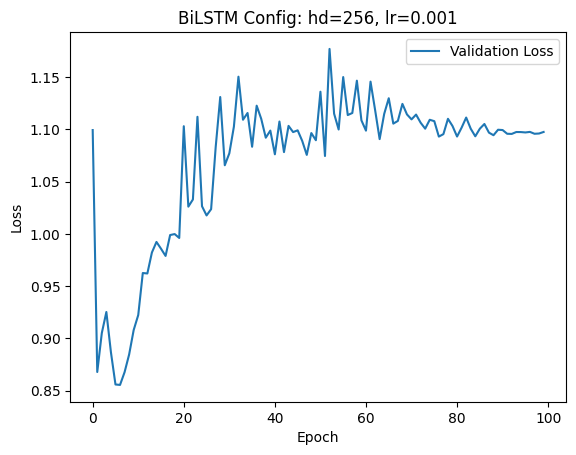

INFO:models.bilstm:BiLSTM Grid search: hidden_dim=256, lr=0.0001
INFO:models.bilstm:BiLSTM built with input_dim=768, hidden_dim=256, bidirectional=True
INFO:models.bilstm:Loaded best BiLSTM model state based on validation loss.
INFO:models.bilstm:Final validation loss: 1.1663 for hidden_dim=256, lr=0.0001


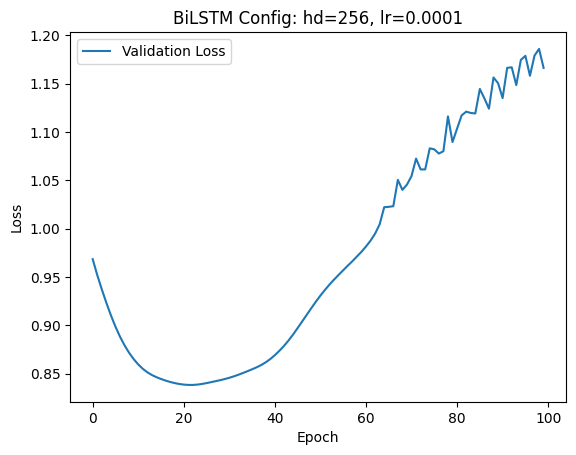

Best Hyperparameters: {'hidden_dim': 64, 'lr': 0.0001}


In [7]:
dummy_model = BiLSTMModel(input_dim)
best_model, best_params, train_losses, valid_losses = dummy_model.grid_search(
    train_data=(X_train.cpu().numpy(), y_train),
    valid_data=(X_valid.cpu().numpy(), y_valid),
    grid_params=grid_params,
    epochs=epochs,
    device=device
)

print("Best Hyperparameters:", best_params)

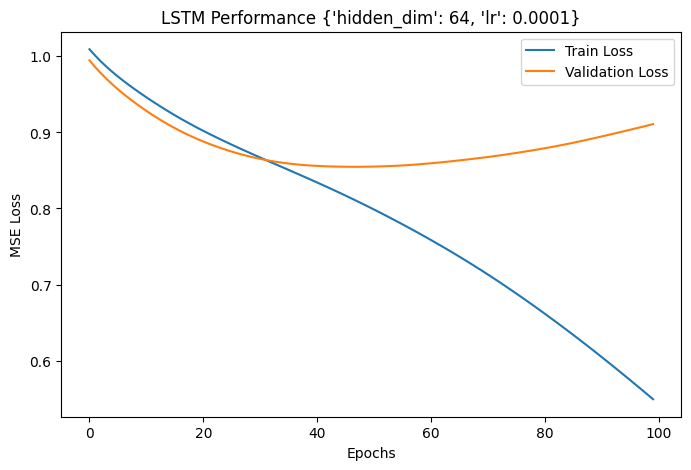

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title(f"LSTM Performance {best_params}")
plt.legend()
plt.savefig("plots/benchmark_2/lstm_grid_search.pdf")
plt.show()

In [ ]:
test_preds = best_model.evaluate(test_data=(X_test.cpu().numpy(), y_test), device=device)

In [10]:
mse, mae, r2, nll, crps = evaluate_model(y_test, test_preds)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, NLL: {nll:.4f}, CRPS: {crps:.4f}")

MSE: 0.8702, MAE: 0.7646, R2: 0.1298, NLL: 1.3494, CRPS: 0.7646


In [11]:
best_model.save(save_path)

INFO:models.bilstm:BiLSTM model saved to baseline_weights/benchmark_2/bilstm.pth
